In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split 

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/tone/Documents/Spring 2022/640/Weather Data Set Predictions.csv')

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/12,0.0,12.8,5.0,4.7,drizzle
1,1/2/12,10.9,10.6,2.8,4.5,rain
2,1/3/12,0.8,11.7,7.2,2.3,rain
3,1/4/12,20.3,12.2,5.6,4.7,rain
4,1/5/12,1.3,8.9,2.8,6.1,rain


In [4]:
df.isna().any()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

In [5]:
df.replace(to_replace ="rain", value = 1, inplace = True)
df.replace(to_replace ="drizzle", value = 2, inplace = True)
df.replace(to_replace ="fog", value = 3, inplace = True)
df.replace(to_replace ="sun", value = 4, inplace = True)
df.replace(to_replace ="snow", value = 5, inplace = True)

In [6]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/12,0.0,12.8,5.0,4.7,2
1,1/2/12,10.9,10.6,2.8,4.5,1
2,1/3/12,0.8,11.7,7.2,2.3,1
3,1/4/12,20.3,12.2,5.6,4.7,1
4,1/5/12,1.3,8.9,2.8,6.1,1


In [7]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [8]:
df = df[df['date'].dt.year==2015]

In [9]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
1096,2015-01-01,0.0,5.6,-3.2,1.2,4
1097,2015-01-02,1.5,5.6,0.0,2.3,1
1098,2015-01-03,0.0,5.0,1.7,1.7,3
1099,2015-01-04,10.2,10.6,3.3,4.5,1
1100,2015-01-05,8.1,12.2,9.4,6.4,1


In [10]:
df = df.drop(columns= ['date'])

In [11]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
1096,0.0,5.6,-3.2,1.2,4
1097,1.5,5.6,0.0,2.3,1
1098,0.0,5.0,1.7,1.7,3
1099,10.2,10.6,3.3,4.5,1
1100,8.1,12.2,9.4,6.4,1


In [12]:
df.describe()

,precipitation,temp_max,temp_min,wind,weather
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,3.121096,17.427945,8.835616,3.159726,2.635616
std,7.686324,7.321464,4.820007,1.329771,1.383316
min,0.000000,1.700000,-3.800000,0.500000,1.000000
25%,0.000000,11.700000,5.600000,2.300000,1.000000
50%,0.000000,16.100000,8.900000,2.900000,3.000000
75%,1.800000,22.800000,12.800000,3.900000,4.000000
max,55.900000,35.000000,18.300000,8.000000,4.000000


In [13]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1096 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  365 non-null    float64
 1   temp_max       365 non-null    float64
 2   temp_min       365 non-null    float64
 3   wind           365 non-null    float64
 4   weather        365 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 17.1 KB


(365, 5)

In [14]:
df.isna() #to see if missing values

,precipitation,temp_max,temp_min,wind,weather
1096,False,False,False,False,False
1097,False,False,False,False,False
1098,False,False,False,False,False
1099,False,False,False,False,False
1100,False,False,False,False,False
...,...,...,...,...,...
1456,False,False,False,False,False
1457,False,False,False,False,False
1458,False,False,False,False,False
1459,False,False,False,False,False


In [15]:
df.corr() #may need a different code

,precipitation,temp_max,temp_min,wind,weather
precipitation,1.000000,-0.250957,-0.088844,0.448893,-0.481438
temp_max,-0.250957,1.000000,0.876798,-0.080203,0.473645
temp_min,-0.088844,0.876798,1.000000,0.032821,0.229146
wind,0.448893,-0.080203,0.032821,1.000000,-0.225003
weather,-0.481438,0.473645,0.229146,-0.225003,1.000000


In [16]:
print(df.corr())

               precipitation  temp_max  temp_min      wind   weather
precipitation       1.000000 -0.250957 -0.088844  0.448893 -0.481438
temp_max           -0.250957  1.000000  0.876798 -0.080203  0.473645
temp_min           -0.088844  0.876798  1.000000  0.032821  0.229146
wind                0.448893 -0.080203  0.032821  1.000000 -0.225003
weather            -0.481438  0.473645  0.229146 -0.225003  1.000000


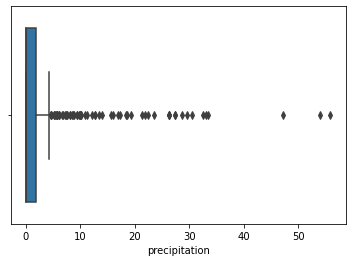

In [17]:
sns.boxplot(df['precipitation'])

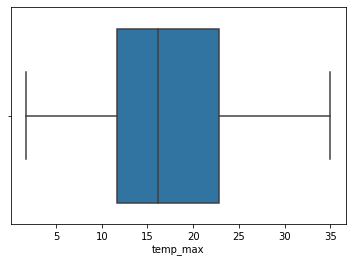

In [18]:
sns.boxplot(df['temp_max'])

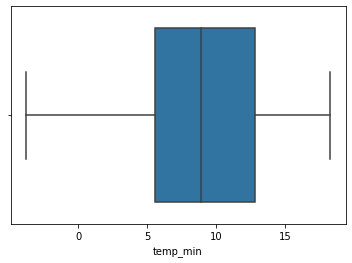

In [19]:
sns.boxplot(df['temp_min'])

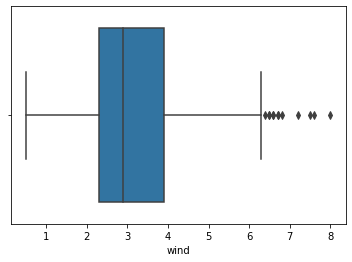

In [20]:
sns.boxplot(df['wind'])

In [21]:
# For precipitation, values above 40 are considered outliers.
np.where(df['precipitation']>40)

(array([ 73, 317, 341]),)

In [22]:
# For wind, values above 8.5 are considered outliers.
np.where(df['wind']>8.5)

(array([], dtype=int64),)

In [23]:
df_update = df[~(df['precipitation']>40)]

In [24]:
df_update = df[~(df['wind']>8.5)]

In [25]:
df_update_X = df_update.loc[:,~df_update.columns.isin(['date','weather'])]

In [26]:
df_update_X.head()

,precipitation,temp_max,temp_min,wind
1096,0.0,5.6,-3.2,1.2
1097,1.5,5.6,0.0,2.3
1098,0.0,5.0,1.7,1.7
1099,10.2,10.6,3.3,4.5
1100,8.1,12.2,9.4,6.4


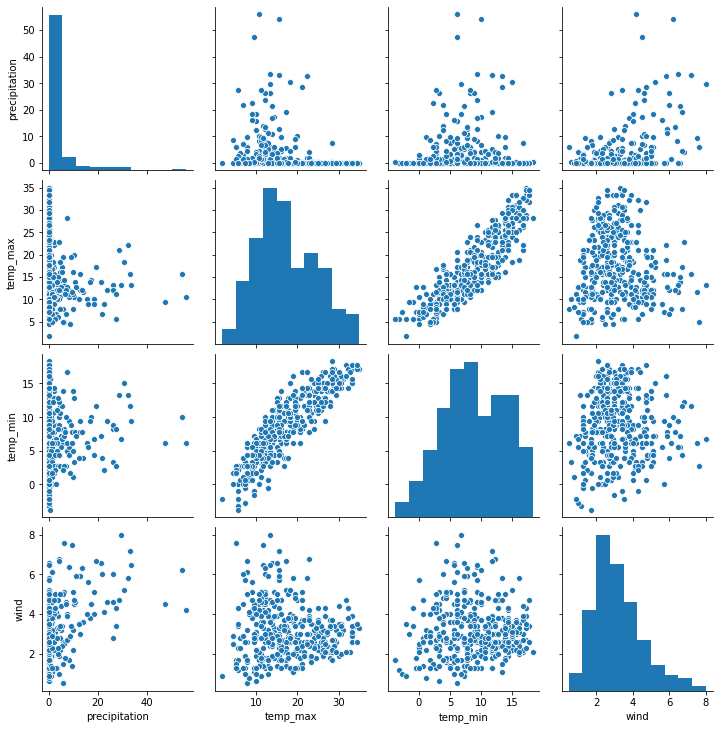

In [27]:
sns.pairplot(df_update_X)

In [28]:
df_update_X.corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.250957,-0.088844,0.448893
temp_max,-0.250957,1.000000,0.876798,-0.080203
temp_min,-0.088844,0.876798,1.000000,0.032821
wind,0.448893,-0.080203,0.032821,1.000000


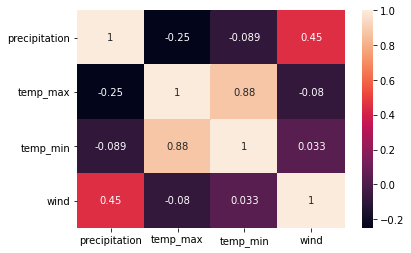

In [29]:
sns.heatmap(df_update_X.corr(),annot=True)

In [30]:
df['temp_avg'] = df[['temp_max','temp_min']].mean(axis=1)

In [31]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,temp_avg
1096,0.0,5.6,-3.2,1.2,4,1.20
1097,1.5,5.6,0.0,2.3,1,2.80
1098,0.0,5.0,1.7,1.7,3,3.35
1099,10.2,10.6,3.3,4.5,1,6.95
1100,8.1,12.2,9.4,6.4,1,10.80


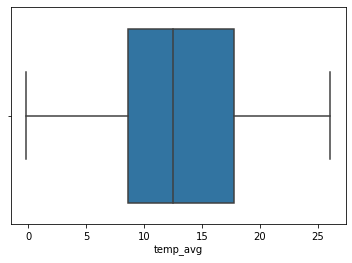

In [32]:
sns.boxplot(df['temp_avg'])

In [33]:
df_update = df[~(df['precipitation']>40)]

In [34]:
df_update = df[~(df['wind']>8.5)]

In [35]:
df_update_X = df_update.loc[:,~df_update.columns.isin(['date','weather','temp_max','temp_min'])]


In [36]:
df_update_X.head()

,precipitation,wind,temp_avg
1096,0.0,1.2,1.20
1097,1.5,2.3,2.80
1098,0.0,1.7,3.35
1099,10.2,4.5,6.95
1100,8.1,6.4,10.80


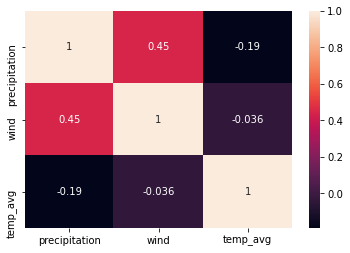

In [37]:
df_update_X.corr()
sns.heatmap(df_update_X.corr(),annot=True)

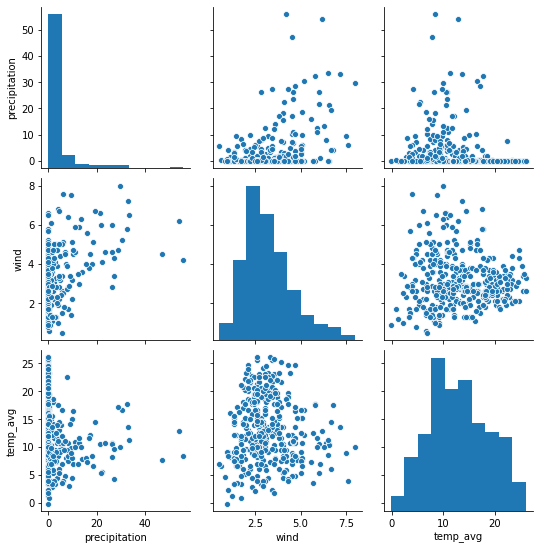

In [38]:
sns.pairplot(df_update_X)
plt.show()

(array([144.,   0.,   0.,   7.,   0.,   0.,  52.,   0.,   0., 162.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

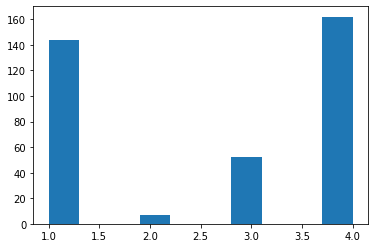

In [39]:
plt.hist(df_update['weather'])

In [40]:
#(independent variables)

X = df[['precipitation', 'temp_avg', 'wind']]

#label (dependent variable/ target variable)
y = df['weather']

In [41]:
X.head()

,precipitation,temp_avg,wind
1096,0.0,1.20,1.2
1097,1.5,2.80,2.3
1098,0.0,3.35,1.7
1099,10.2,6.95,4.5
1100,8.1,10.80,6.4


In [42]:
y.head()

1096    4
1097    1
1098    3
1099    1
1100    1
Name: weather, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [44]:
X_train

,precipitation,temp_avg,wind
1153,18.3,8.35,4.0
1202,0.0,12.50,3.6
1412,33.5,11.35,6.5
1428,0.0,-0.20,0.9
1358,4.1,17.50,6.8
...,...,...,...
1331,0.0,18.05,2.3
1367,0.0,15.30,1.9
1209,3.3,9.15,5.0
1443,0.0,4.75,1.7


In [45]:
X_test

,precipitation,temp_avg,wind
1204,0.0,14.70,3.6
1118,5.8,10.25,2.6
1152,9.4,9.75,1.4
1279,0.0,25.55,2.6
1440,0.3,6.90,2.8
...,...,...,...
1240,0.0,13.35,2.7
1233,0.0,18.90,3.0
1145,4.6,9.45,2.2
1344,5.3,13.90,2.4


In [46]:
y_train

1153    1
1202    4
1412    1
1428    3
1358    1
       ..
1331    4
1367    4
1209    1
1443    4
1328    4
Name: weather, Length: 255, dtype: int64

In [47]:
y_test

1204    4
1118    1
1152    1
1279    4
1440    1
       ..
1240    4
1233    4
1145    1
1344    1
1341    4
Name: weather, Length: 110, dtype: int64

In [48]:
#building classifier

from sklearn.ensemble import RandomForestClassifier #random forest model
from sklearn import metrics #scikit-learn modeule for accuracy calculation

clf = RandomForestClassifier(n_estimators=100)

In [49]:
#TRAIINING the model on training set

clf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
#testing the model on test dataset

y_pred = clf.predict(X_test)

In [51]:
y_pred

array([4, 1, 1, 4, 1, 4, 4, 1, 4, 4, 4, 3, 4, 4, 4, 4, 1, 3, 4, 4, 1, 3,
       4, 4, 4, 1, 4, 3, 4, 4, 3, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 3, 4,
       4, 4, 4, 1, 3, 1, 3, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 3, 3, 1, 4, 4,
       4, 4, 1, 1, 1, 3, 4, 3, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4, 4, 3, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 4, 1, 4, 4, 4, 1, 1, 4, 3, 1, 3, 4, 1, 1, 4])

In [52]:
#printing model accuracy

print('Accuracy', metrics.accuracy_score(y_test,y_pred))

Accuracy 0.8181818181818182


In [53]:
#Predicting with unseen data

clf.predict([[0,25,33]]) #Random numbers for independent variables predict target varibales

array([4])

In [54]:
#Import confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix

In [55]:
#confusion matrix evaluating the performance of a classification model, where N is the number of target classes. 
#The matrix compares the actual target values with those predicted by the machine learning model.

print(confusion_matrix(y_test, y_pred))

[[43  0  0  0]
 [ 0  0  0  1]
 [ 0  0  7 10]
 [ 0  0  9 40]]


In [56]:
#Precision — What percent of your predictions were correct?

#Recall — What percent of the positive cases did you catch?

#F1 score — What percent of positive predictions were correct?

#Support is the number of actual occurrences of the class in the specified dataset.

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        43
           2       0.00      0.00      0.00         1
           3       0.44      0.41      0.42        17
           4       0.78      0.82      0.80        49

    accuracy                           0.82       110
   macro avg       0.56      0.56      0.56       110
weighted avg       0.81      0.82      0.81       110



/Users/tone/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
print('Accuracy', metrics.accuracy_score(y_test,y_pred))

Accuracy 0.8181818181818182


In [58]:
pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
applaunchservices==0.2.1
appnope @ file:///opt/concourse/worker/volumes/live/0291c9e1-4b15-459f-623e-2770f55be269/volume/appnope_1594338395037/work
appscript @ file:///opt/concourse/worker/volumes/live/50ca4c96-3090-40bb-6981-3a6114ed0af4/volume/appscript_1594840187551/work
argh==0.26.2
asn1crypto @ file:///opt/concourse/worker/volumes/live/29c500db-6cdf-4cc7-7df8-fca74d6f0b64/volume/asn1crypto_1594339172552/work
astroid @ file:///opt/concourse/worker/volumes/live/21fd14a9-2a7e-484b-7394-5a9912cdcf80/volume/astroid_1592498459180/work
astropy==4.0.1.post1
atomicwrites==1.4.0
attrs==19.3.0
autopep8 @ file:///tmp/build/80754af9/autopep8_1592412889138/work
Babel==2.8.0
backcall==0.2.0
backports.functools-lru-cache @ file:///tmp/build/80754af9/backports.functools_lru_cache_1618170165463/work
backports.shutil-get-terminal-size==1.0.0
backports.tempfile @ file:///home/linux1/recipes/ci/backports.tempfi

Note: you may need to restart the kernel to use updated packages.
